In [1]:
import numpy as np
import datetime
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import math, warnings
import statistics 
from collections import defaultdict
import requests
import json
import urllib
import xmltodict

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
# API connection
# sending get request and saving the response as response object 
url = "https://data.ibb.gov.tr/tr/datastore/odata3.0/e0a9dfd3-1579-4412-ab46-e54fb78e5b4d?$top=101506&$format=json"
r = urllib.request.urlopen(url)
# Veriyi python-json dosya biçimine dönüştürme
data = json.loads(r.read().decode())
# Sadece datanın olduğu bölümün alınması
data = data.get("value")
# Verinin dataframe formatına dönüştürülmesi
df = pd.DataFrame(data)
df

_id  Trafik Indeks (%) Trafik Indeks Tarihi
0            1                 44  2020-02-04T11:05:00
1            2                 44  2020-02-04T11:00:00
2            3                 44  2020-02-04T10:55:00
3            4                 45  2020-02-04T10:50:00
4            5                 45  2020-02-04T10:45:00
...        ...                ...                  ...
101501  101502                  4  2019-01-01T00:22:00
101502  101503                  4  2019-01-01T00:17:00
101503  101504                  4  2019-01-01T00:12:00
101504  101505                  4  2019-01-01T00:07:00
101505  101506                  2  2019-01-01T00:02:00

[101506 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101506 entries, 0 to 101505
Data columns (total 3 columns):
_id                     101506 non-null int64
Trafik Indeks (%)       101506 non-null int64
Trafik Indeks Tarihi    101506 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [4]:
df.describe()

_id  Trafik Indeks (%)
count  101506.000000      101506.000000
mean    50753.500000          25.902567
std     29302.402549          18.333349
min         1.000000           1.000000
25%     25377.250000           8.000000
50%     50753.500000          26.000000
75%     76129.750000          40.000000
max    101506.000000          83.000000

In [5]:
df.columns

Index(['_id', 'Trafik Indeks (%)', 'Trafik Indeks Tarihi'], dtype='object')

In [6]:
df['Trafik Indeks Tarihi'].value_counts()

2019-09-26T05:35:00    1
2019-03-08T16:10:00    1
2020-01-10T00:23:00    1
2019-12-06T06:43:00    1
2019-05-08T21:01:00    1
                      ..
2019-03-08T22:45:00    1
2019-07-09T14:56:00    1
2019-03-30T01:05:00    1
2019-06-26T08:32:00    1
2019-04-04T20:07:00    1
Name: Trafik Indeks Tarihi, Length: 101506, dtype: int64

In [7]:
df['Date'] = df['Trafik Indeks Tarihi'].apply(lambda x : x.split('T')[0])
df['Time'] = df['Trafik Indeks Tarihi'].apply(lambda x : x.split('T')[1])
df

_id  Trafik Indeks (%) Trafik Indeks Tarihi        Date      Time
0            1                 44  2020-02-04T11:05:00  2020-02-04  11:05:00
1            2                 44  2020-02-04T11:00:00  2020-02-04  11:00:00
2            3                 44  2020-02-04T10:55:00  2020-02-04  10:55:00
3            4                 45  2020-02-04T10:50:00  2020-02-04  10:50:00
4            5                 45  2020-02-04T10:45:00  2020-02-04  10:45:00
...        ...                ...                  ...         ...       ...
101501  101502                  4  2019-01-01T00:22:00  2019-01-01  00:22:00
101502  101503                  4  2019-01-01T00:17:00  2019-01-01  00:17:00
101503  101504                  4  2019-01-01T00:12:00  2019-01-01  00:12:00
101504  101505                  4  2019-01-01T00:07:00  2019-01-01  00:07:00
101505  101506                  2  2019-01-01T00:02:00  2019-01-01  00:02:00

[101506 rows x 5 columns]

In [8]:
df["Day"] = pd.to_datetime(df['Date'].apply(lambda x : x)).dt.day_name()
df["Month"] = pd.to_datetime(df['Date'].apply(lambda x : x)).dt.month_name()
df["Year"] = df['Date'].apply(lambda x : str(x).split("-")[0])
df["Hour"] = df['Time'].apply(lambda x : str(x).split(":")[0])

df

_id  Trafik Indeks (%) Trafik Indeks Tarihi        Date      Time  \
0            1                 44  2020-02-04T11:05:00  2020-02-04  11:05:00   
1            2                 44  2020-02-04T11:00:00  2020-02-04  11:00:00   
2            3                 44  2020-02-04T10:55:00  2020-02-04  10:55:00   
3            4                 45  2020-02-04T10:50:00  2020-02-04  10:50:00   
4            5                 45  2020-02-04T10:45:00  2020-02-04  10:45:00   
...        ...                ...                  ...         ...       ...   
101501  101502                  4  2019-01-01T00:22:00  2019-01-01  00:22:00   
101502  101503                  4  2019-01-01T00:17:00  2019-01-01  00:17:00   
101503  101504                  4  2019-01-01T00:12:00  2019-01-01  00:12:00   
101504  101505                  4  2019-01-01T00:07:00  2019-01-01  00:07:00   
101505  101506                  2  2019-01-01T00:02:00  2019-01-01  00:02:00   

            Day     Month  Year Hour  
0       Tuesday  February  2020   11  
1       Tuesday  February  2020   11  
2       Tuesday  February  2020   10  
3       Tuesday  February  2020   10  
4       Tuesday  February  2020   10  
...         ...       ...   ...  ...  
101501  Tuesday   January  2019   00  
101502  Tuesday   January  2019   00  
101503  Tuesday   January  2019   00  
101504  Tuesday   January  2019   00  
101505  Tuesday   January  2019   00  

[101506 rows x 9 columns]

In [9]:
df.columns

Index(['_id', 'Trafik Indeks (%)', 'Trafik Indeks Tarihi', 'Date', 'Time',
       'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [10]:
df.Hour.value_counts()

00    4270
01    4269
13    4250
07    4250
22    4249
21    4248
06    4247
05    4243
12    4243
11    4234
10    4234
20    4234
04    4233
08    4232
23    4232
09    4231
14    4229
15    4228
19    4224
03    4214
16    4210
17    4209
18    4202
02    4091
Name: Hour, dtype: int64

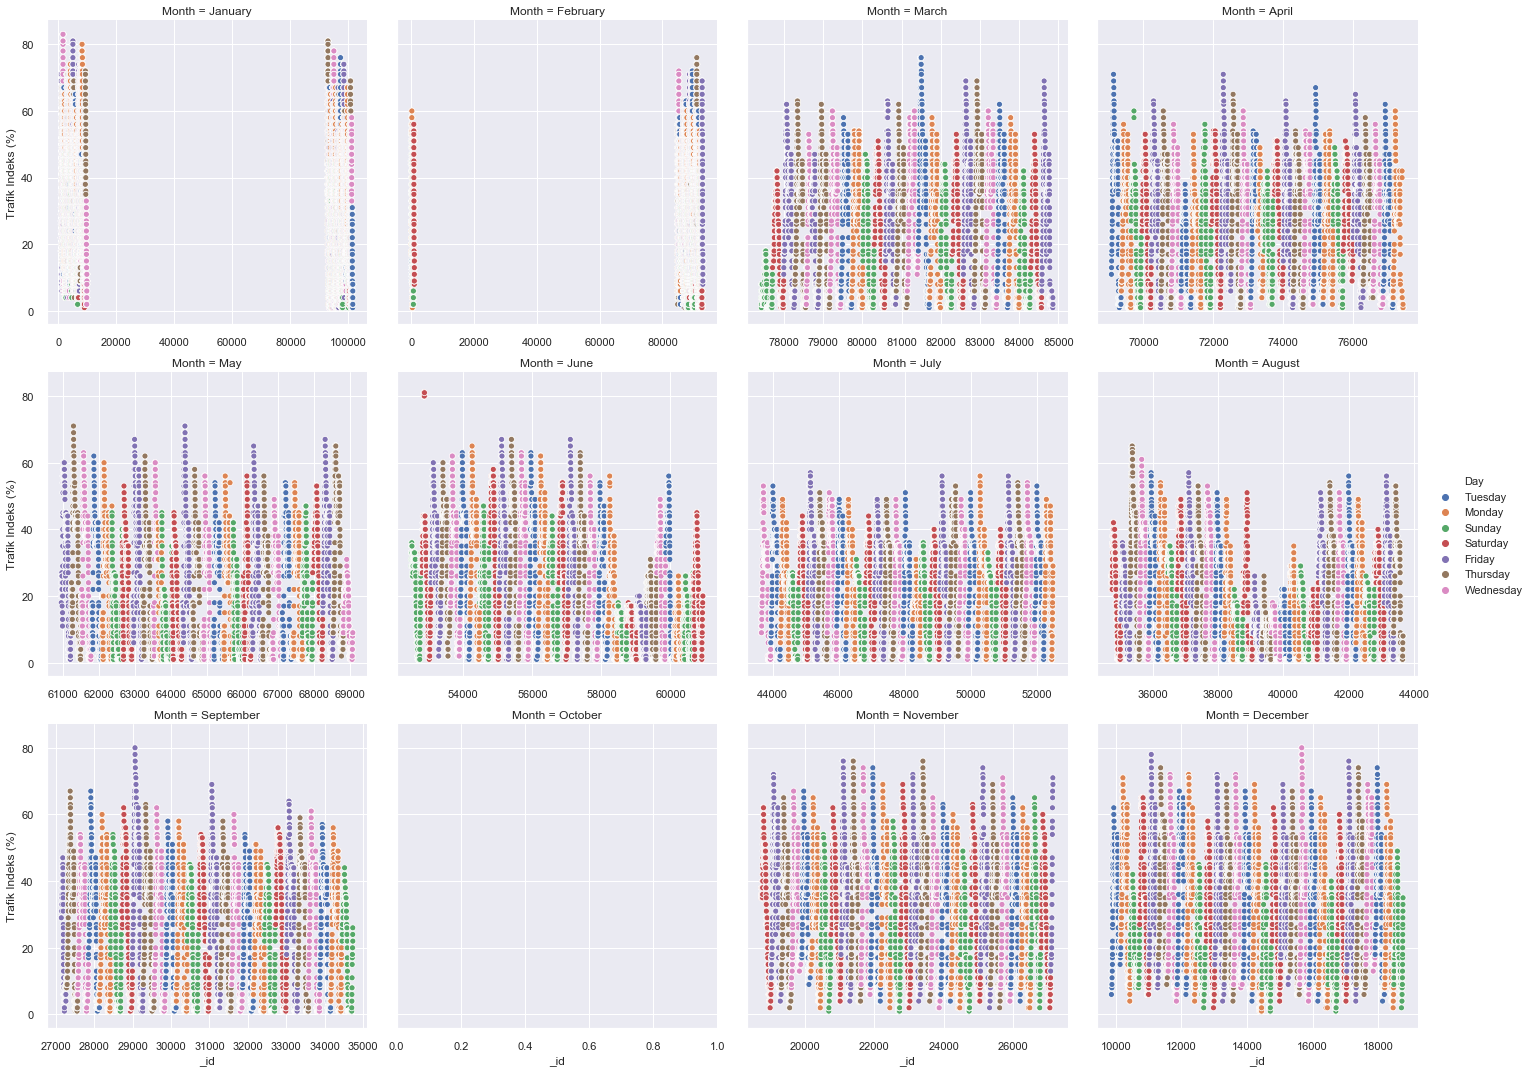

In [20]:
sns_plot = sns.relplot(x = '_id', y = 'Trafik Indeks (%)', hue = 'Day', col ='Month', col_wrap = 4, data = df, facet_kws=dict( sharex=False,sharey=True, despine=True), col_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

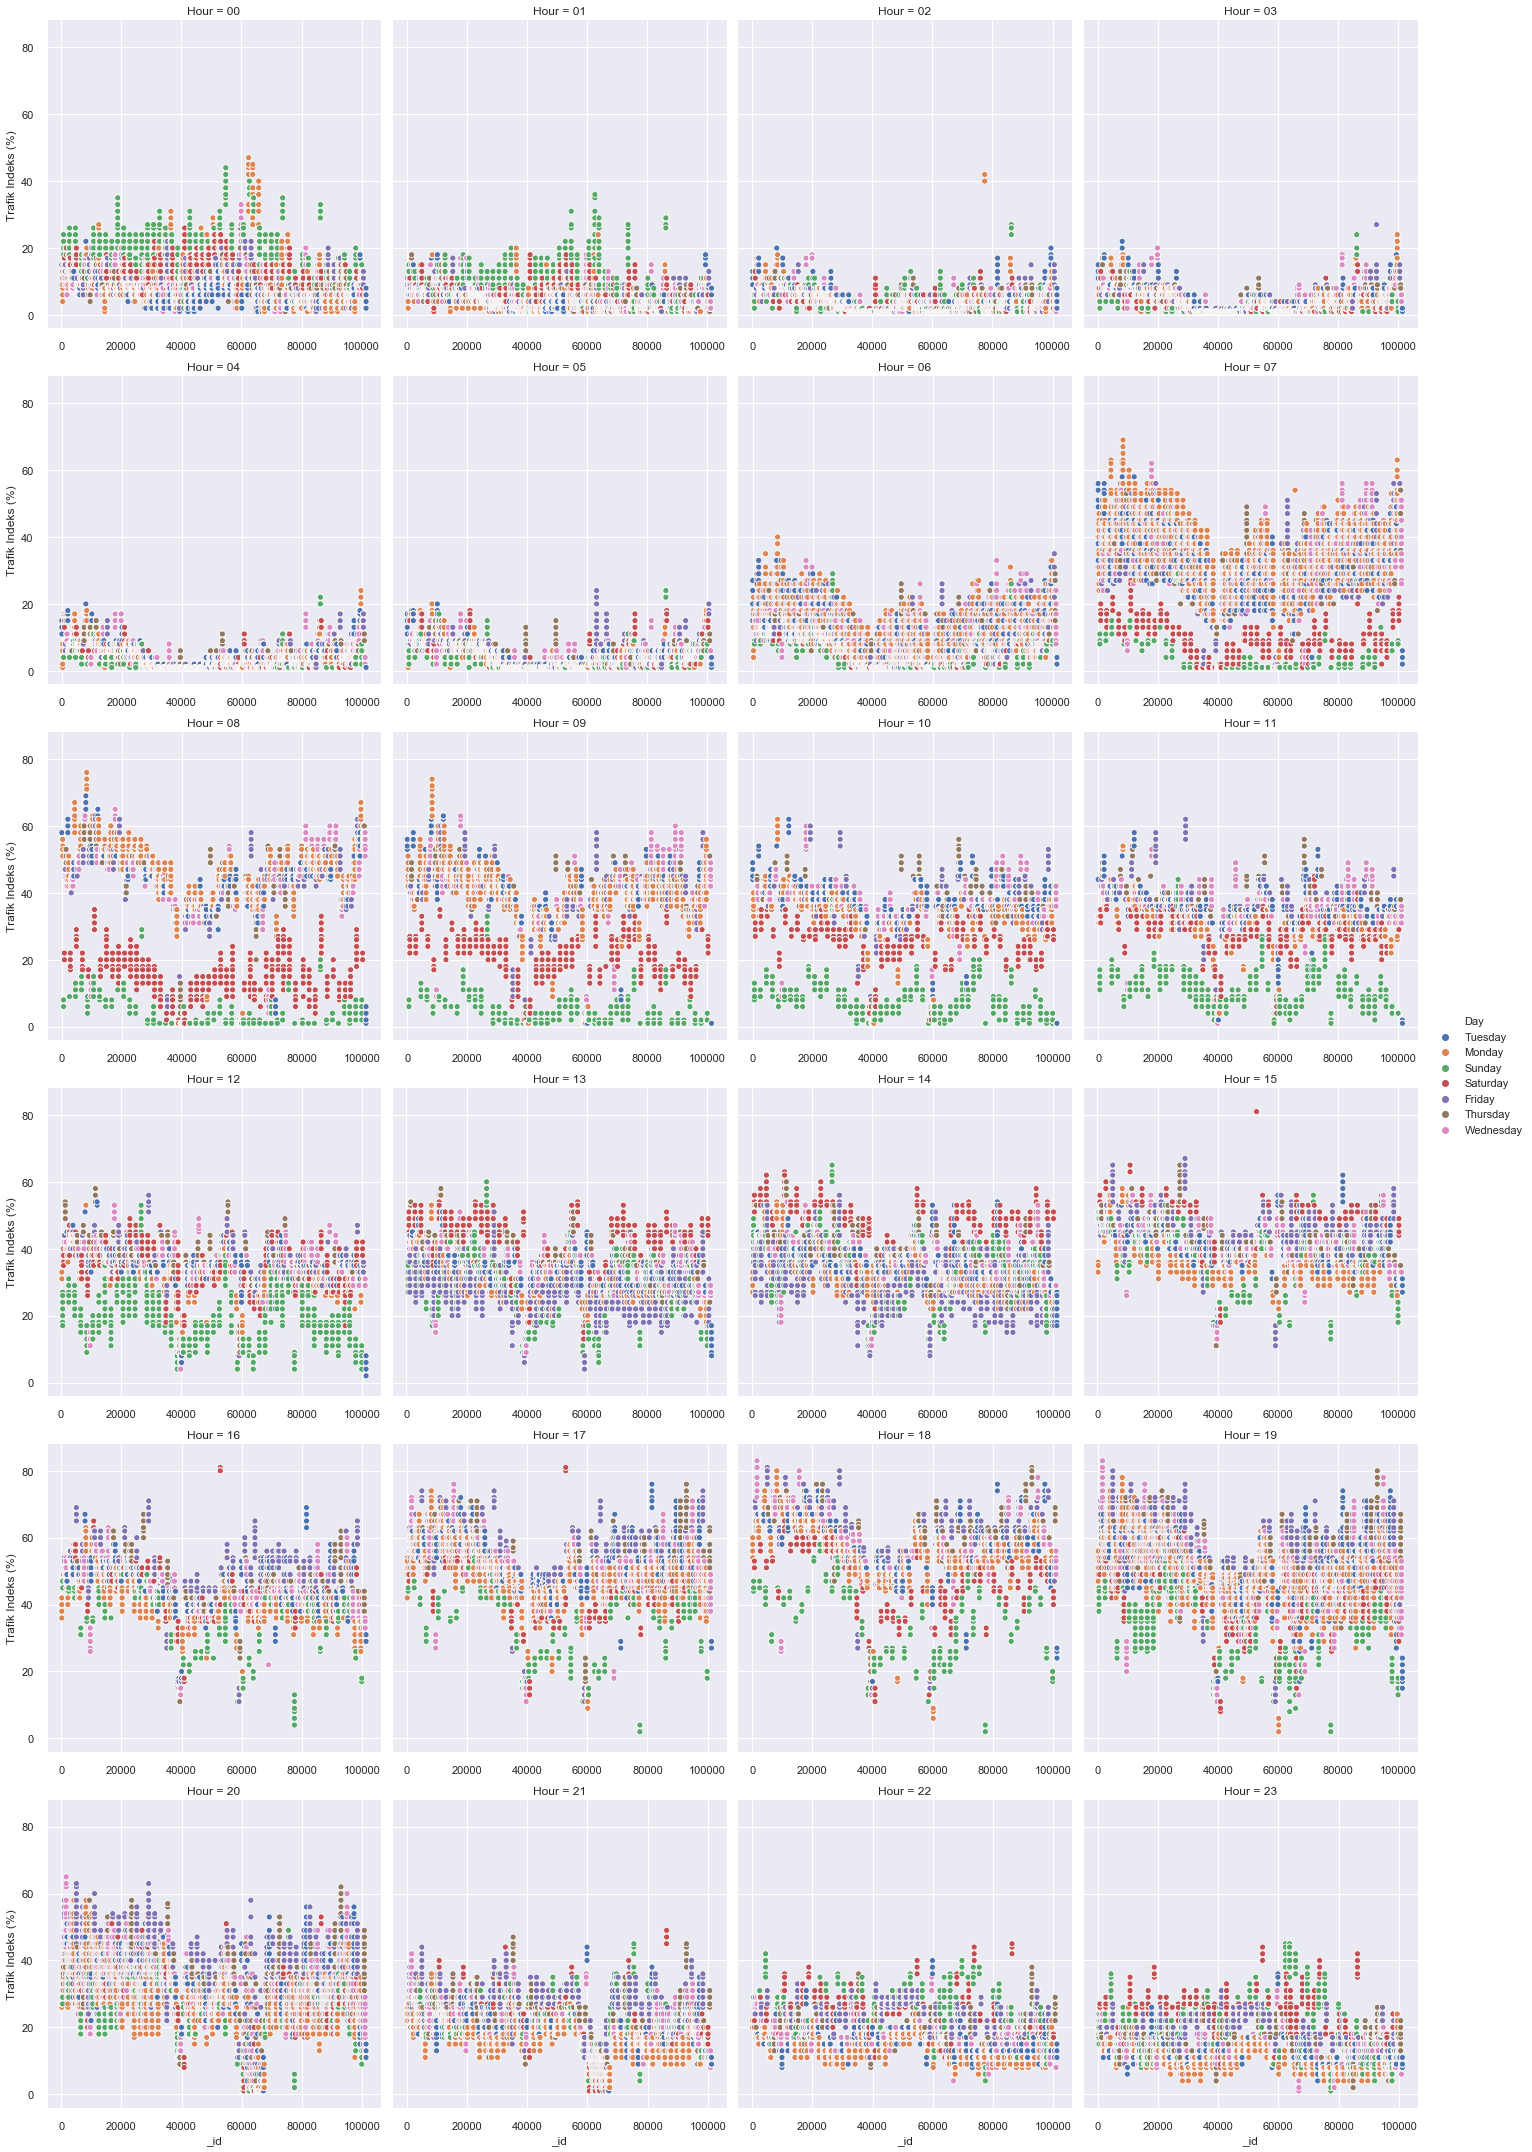

In [23]:
sns_plot = sns.relplot(x = '_id', y = 'Trafik Indeks (%)', hue = 'Day', col ='Hour', col_wrap = 4, data = df, facet_kws=dict( sharex=False,sharey=True, despine=True), col_order=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

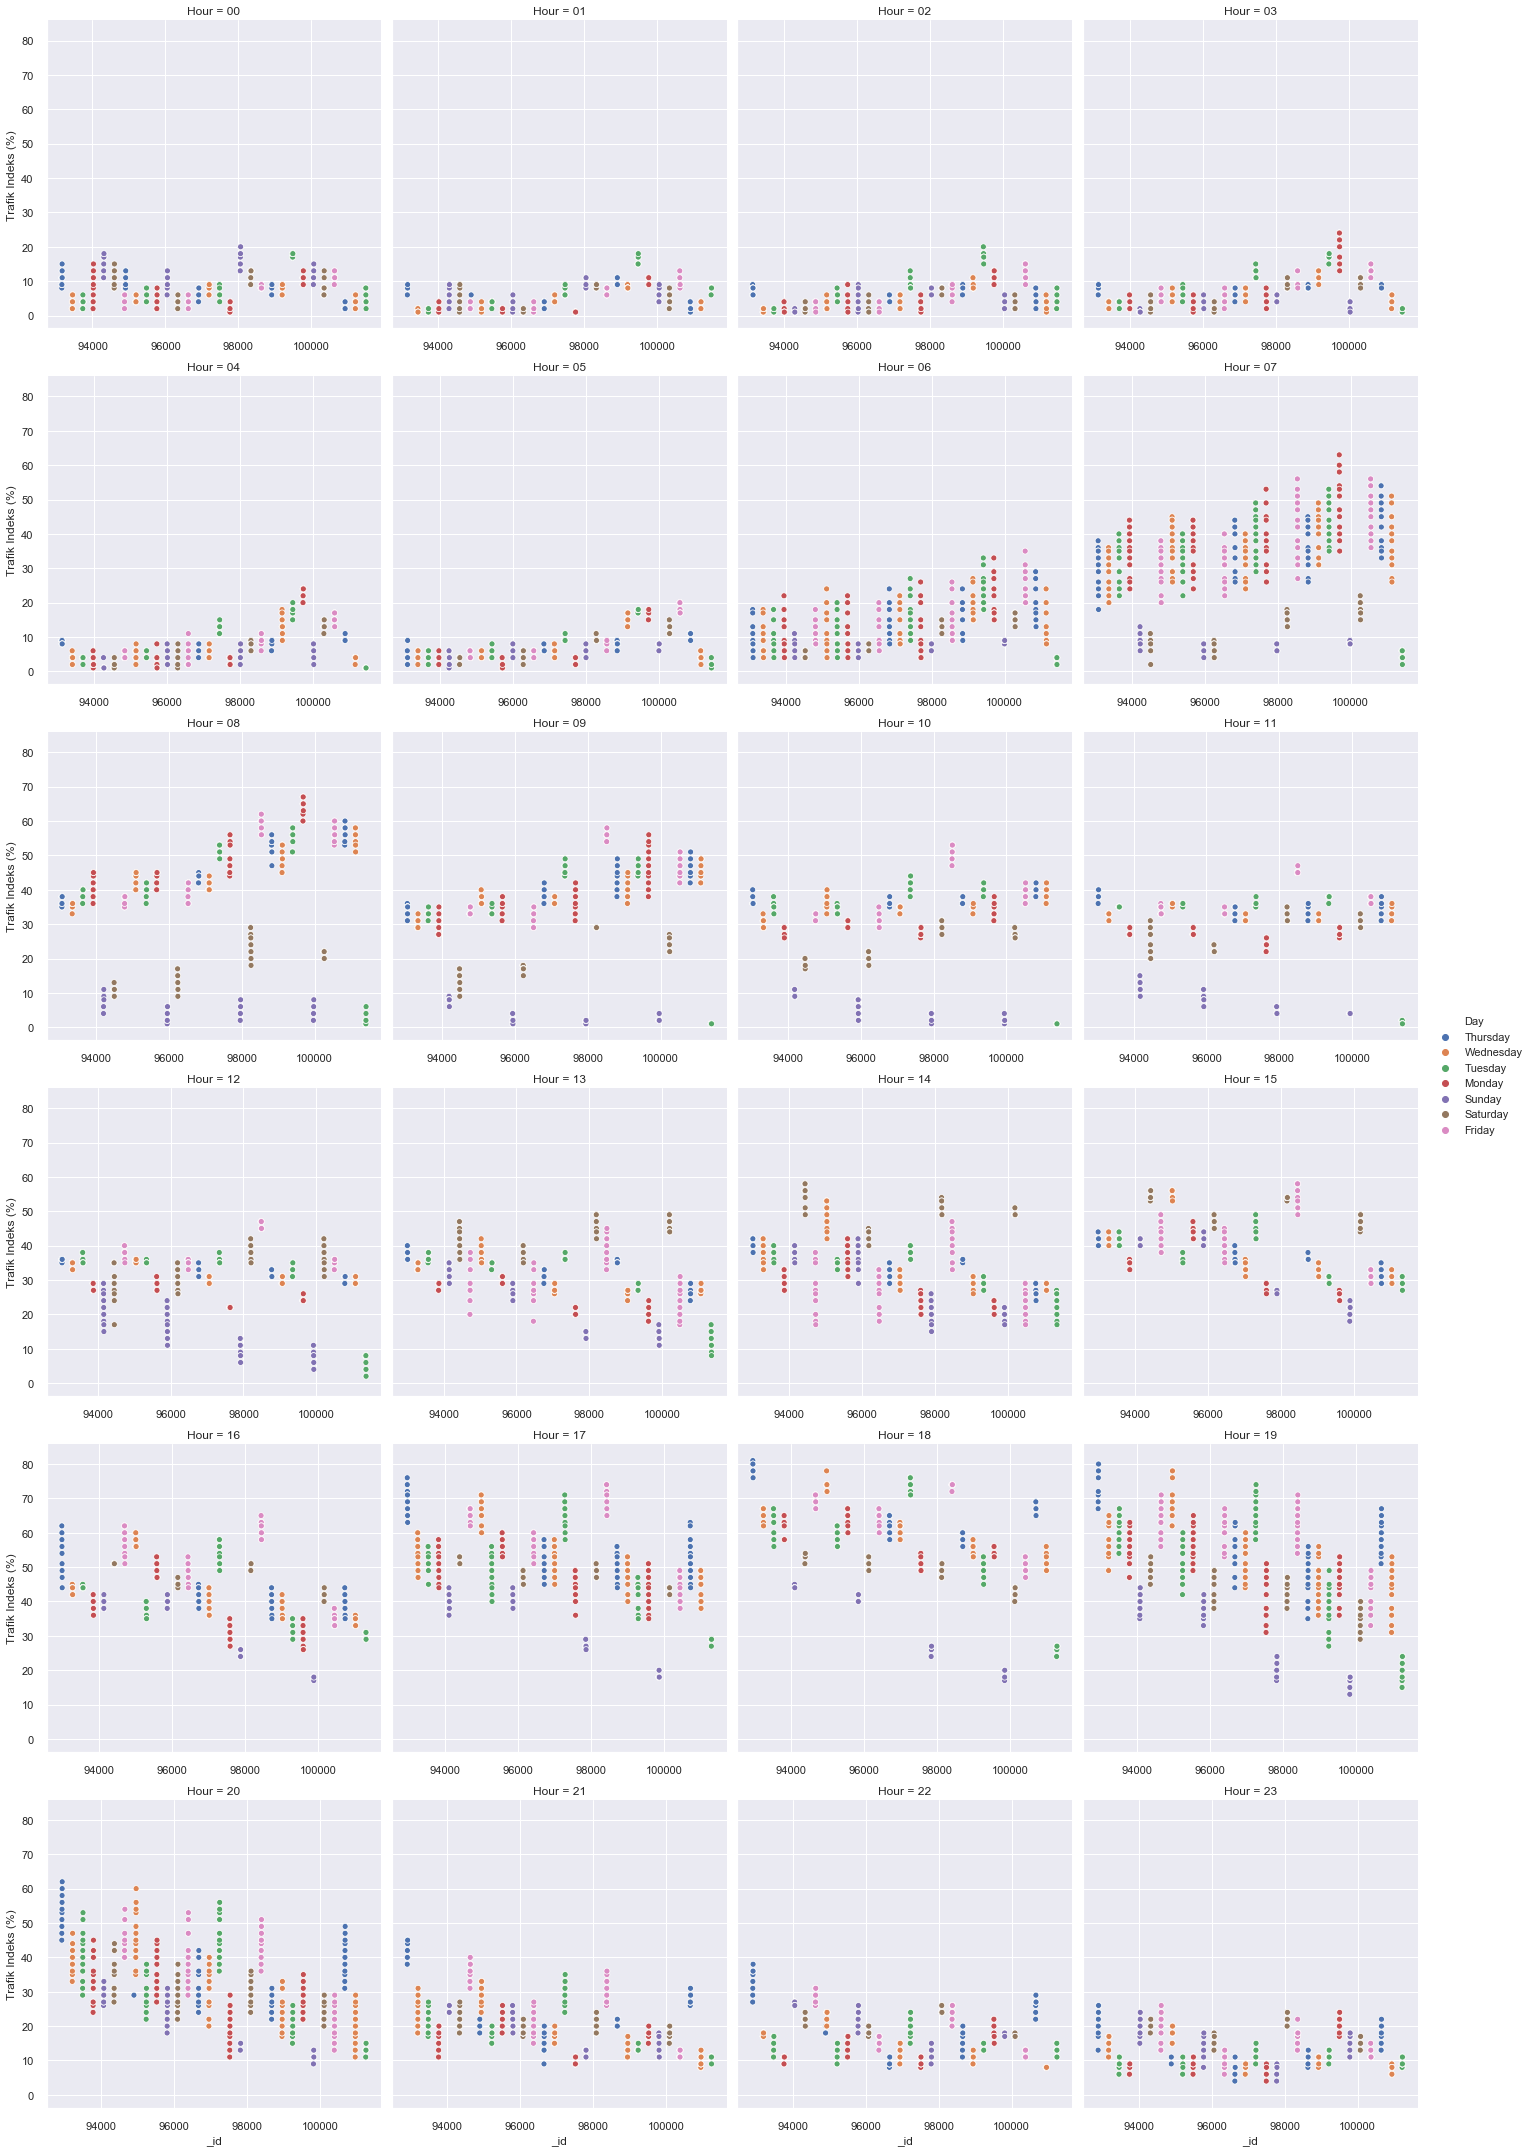

In [27]:
sns_plot = sns.relplot(x = '_id', y = 'Trafik Indeks (%)', hue = 'Day', col ='Hour', col_wrap = 4, data = df.query("(Month == 'January') & (Year == '2019')"), facet_kws=dict( sharex=False,sharey=True, despine=True), col_order=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

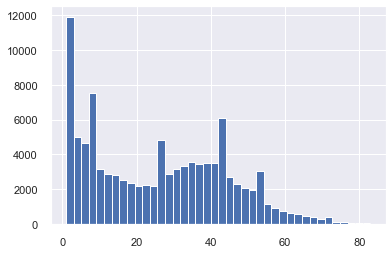

In [36]:
hist = df['Trafik Indeks (%)'].hist(bins=40)

In [8]:
df_f = df.loc[df['Day'] == 'Friday']

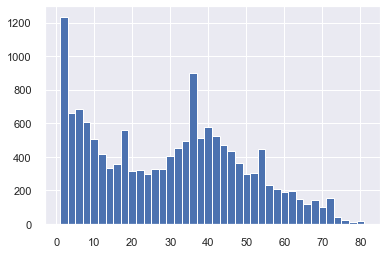

In [9]:
hist = df_f['Trafik Indeks (%)'].hist(bins=40)

In [10]:
df_f_19 = df.loc[df['Day'] == 'Friday'].loc[df['Hour'] == '19']

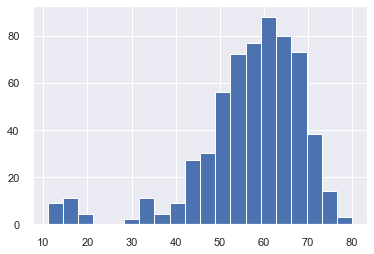

In [53]:
hist = df_f_19['Trafik Indeks (%)'].hist(bins=20)

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [12]:
# Regression on only unnormalized Temp data
X_train, X_test, y_train, y_test = train_test_split(df_f_19['Trafik Indeks (%)'], df_f_19['_id'], test_size=0.2, random_state=42)



In [65]:
X_train

72273    63
21104    74
82623    60
25105    67
1053     69
         ..
11073    76
17098    72
45133    53
72272    63
17094    69
Name: Trafik Indeks (%), Length: 486, dtype: int64

In [68]:
X_test

19093    58
1054     71
31052    65
13070    62
90639    49
         ..
41125    47
27123    65
27116    56
90644    56
29049    72
Name: Trafik Indeks (%), Length: 122, dtype: int64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [11]:
# API connection
# sending get request and saving the response as response object 
url = "https://data.ibb.gov.tr/en/datastore/odata3.0/02bfe245-5e5a-472b-b0a4-323d1bae8131?$top=41665&$format=json"
r = urllib.request.urlopen(url)
# Veriyi python-json dosya biçimine dönüştürme
data = json.loads(r.read().decode())
# Sadece datanın olduğu bölümün alınması
data = data.get("value")
# Verinin dataframe formatına dönüştürülmesi
df_info = pd.DataFrame(data)
df_info

_id  Duyuru ID             Duyuru Tipi  \
0          1     410237            Yoğun Trafik   
1          2     410238            Araç Arızası   
2          3     410239          Kaza Bildirimi   
3          4     410240          Kaza Bildirimi   
4          5     410244          Kaza Bildirimi   
...      ...        ...                     ...   
41660  41661     541028            Araç Arızası   
41661  41662     541030  Bakım-Onarım Çalışması   
41662  41663     541031          Kaza Bildirimi   
41663  41664     541033          Kaza Bildirimi   
41664  41665     541034          Kaza Bildirimi   

                                           Duyuru Baslik  \
0      Sahil Yolu Harem-Üsküdar arası çift yönlü yoğu...   
1      D100 Avcılar Şükrübey-Parseller Yönü, sağ şeri...   
2      D100 Avcılar Şükrübey-Parseller Yönü, orta şer...   
3      D100 Küçükçekmece-Florya  Yönü, sağ şerit Traf...   
4      D100 Mecidiyeköy-Zincirlikuyu  Yönü, sağ şerit...   
...                                                  ...   
41660  D100 Pendik-Kartal Yönü, sağ şerit araç arızas...   
41661  TEM FSM Avrupa-Anadolu Yönü,Karayolları Genel ...   
41662  Şile Yolu Tepeüstü-Ümraniye Kavşak Yönü, sol ş...   
41663  O-3 Sağmalcılar Viyadüğü-Atışalanı Yönü, sağ ş...   
41664  Bağlantı Yolu Yıldırım-Bayrampaşa Otogar Arası...   

                                            Duyuru Metin         Giris Tarihi  \
0      Sahil Yolu Harem-Üsküdar arası çift yönlü yoğu...  2018-01-01T00:32:00   
1      D100 Avcılar Şükrübey-Parseller Yönü, sağ şeri...  2018-01-01T01:12:00   
2      D100 Avcılar Şükrübey-Parseller Yönü, orta şer...  2018-01-01T01:45:00   
3      D100 Küçükçekmece-Florya  Yönü, sağ şerit Traf...  2018-01-01T01:55:00   
4      D100 Mecidiyeköy-Zincirlikuyu  Yönü, sağ şerit...  2018-01-01T02:29:00   
...                                                  ...                  ...   
41660  D100 Pendik-Kartal Yönü, sağ şerit araç arızas...  2020-01-27T14:16:00   
41661  TEM FSM Avrupa-Anadolu Yönü,Karayolları Genel ...  2020-01-27T14:17:00   
41662  Şile Yolu Tepeüstü-Ümraniye Kavşak Yönü, sol ş...  2020-01-27T14:22:00   
41663  O-3 Sağmalcılar Viyadüğü-Atışalanı Yönü, sağ ş...  2020-01-27T14:39:00   
41664  Bağlantı Yolu Yıldırım-Bayrampaşa Otogar Arası...  2020-01-27T14:40:00   

              Bitis Tarihi      Mudahale Tarihi        Kaza Durumu  \
0      2018-01-01T03:00:00  2018-01-01T03:30:00                      
1      2018-01-01T01:41:00  2018-01-01T02:11:00                      
2      2018-01-01T02:20:00  2018-01-01T02:50:00  Ekip sevk edildi.   
3      2018-01-01T02:23:00  2018-01-01T02:53:00  Ekip sevk edildi.   
4      2018-01-01T02:58:00  2018-01-01T03:28:00  Ekip sevk edildi.   
...                    ...                  ...                ...   
41660  2020-01-27T14:45:00  2020-01-27T15:15:00                      
41661  2020-01-27T14:45:00  2020-01-27T15:15:00                      
41662  2020-01-27T14:50:00  2020-01-27T15:20:00  Ekip sevk edildi.   
41663  2020-01-27T15:30:00  2020-01-27T16:00:00  Ekip sevk edildi.   
41664  2020-01-27T15:08:00  2020-01-27T15:38:00  Ekip sevk edildi.   

       Etkilenen Serit Sayisi            Koordinatlar  \
0                         NaN     41.013352,29.011362   
1                         NaN  40.9801706,28.73114098   
2                         1.0  40.9801706,28.73114098   
3                         2.0     40.982070,28.757101   
4                         2.0     41.066462,28.999887   
...                       ...                     ...   
41660                     NaN     40.895672,29.227713   
41661                     1.0     41.090916,29.054888   
41662                     1.0     41.028228,29.129852   
41663                     1.0     41.045471,28.885786   
41664                     1.0     41.049582,28.885261   

                                             Lokasyon  \
0                                 Harem-Üsküdar  Yönü   
1                D100 Avcılar Şükrübey-Parseller Yönü   
2    

In [12]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41665 entries, 0 to 41664
Data columns (total 13 columns):
_id                       41665 non-null int64
Duyuru ID                 41665 non-null int64
Duyuru Tipi               41665 non-null object
Duyuru Baslik             41665 non-null object
Duyuru Metin              41665 non-null object
Giris Tarihi              41665 non-null object
Bitis Tarihi              41665 non-null object
Mudahale Tarihi           41664 non-null object
Kaza Durumu               41665 non-null object
Etkilenen Serit Sayisi    24386 non-null float64
Koordinatlar              41665 non-null object
Lokasyon                  41665 non-null object
Kaza Tipi                 41665 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 4.1+ MB


In [13]:
df_info.describe()

_id      Duyuru ID  Etkilenen Serit Sayisi
count  41665.00000   41665.000000            24386.000000
mean   20833.00000  474875.189296                1.070737
std    12027.79382   35013.865429                0.675442
min        1.00000  410237.000000                0.000000
25%    10417.00000  446270.000000                1.000000
50%    20833.00000  472740.000000                1.000000
75%    31249.00000  500156.000000                1.000000
max    41665.00000  541034.000000                5.000000

In [14]:
df_info.columns

Index(['_id', 'Duyuru ID', 'Duyuru Tipi', 'Duyuru Baslik', 'Duyuru Metin',
       'Giris Tarihi', 'Bitis Tarihi', 'Mudahale Tarihi', 'Kaza Durumu',
       'Etkilenen Serit Sayisi', 'Koordinatlar', 'Lokasyon', 'Kaza Tipi'],
      dtype='object')

In [15]:
df_info['Duyuru Tipi'].value_counts()

Kaza Bildirimi                   19794
Araç Arızası                     14811
Bakım-Onarım Çalışması            4145
Yoğun Trafik                      1641
Yolun Trafiğe Kapanması            357
Çevre Düzenlemesi                  352
Haber                              220
Araç Yangını                       178
Alt Yapı Çalışması                  41
Yol Yapım Çalışması                 36
Şehir Hatları Sefer Bildirisi       28
İmalat Çalışması                    19
İDO Sefer Bildirisi                 18
Yolu Etkileyen Hava Koşulu          17
Diğer                                7
Kontrollü Kapama (Protokol)          1
Name: Duyuru Tipi, dtype: int64

In [16]:
df_info['Kaza Tipi'].value_counts()

                               21871
trafik kazası (hasarlı)        13908
trafik kazası (yaralanmalı)     2957
trafik kazası (zincirleme)      2851
trafik kazası (can kaybı)         77
Seçiniz                            1
Name: Kaza Tipi, dtype: int64

In [17]:
df_info['Etkilenen Serit Sayisi'].value_counts()

1.0    20486
0.0     1830
2.0     1549
5.0      482
3.0       39
Name: Etkilenen Serit Sayisi, dtype: int64

In [19]:
df_accident_info = df_info.drop(['_id', 'Duyuru ID', 'Duyuru Baslik', 'Duyuru Metin','Mudahale Tarihi',
                            'Kaza Durumu', 'Koordinatlar', 'Lokasyon'], axis=1)
df_accident_info

Duyuru Tipi         Giris Tarihi         Bitis Tarihi  \
0                Yoğun Trafik  2018-01-01T00:32:00  2018-01-01T03:00:00   
1                Araç Arızası  2018-01-01T01:12:00  2018-01-01T01:41:00   
2              Kaza Bildirimi  2018-01-01T01:45:00  2018-01-01T02:20:00   
3              Kaza Bildirimi  2018-01-01T01:55:00  2018-01-01T02:23:00   
4              Kaza Bildirimi  2018-01-01T02:29:00  2018-01-01T02:58:00   
...                       ...                  ...                  ...   
41660            Araç Arızası  2020-01-27T14:16:00  2020-01-27T14:45:00   
41661  Bakım-Onarım Çalışması  2020-01-27T14:17:00  2020-01-27T14:45:00   
41662          Kaza Bildirimi  2020-01-27T14:22:00  2020-01-27T14:50:00   
41663          Kaza Bildirimi  2020-01-27T14:39:00  2020-01-27T15:30:00   
41664          Kaza Bildirimi  2020-01-27T14:40:00  2020-01-27T15:08:00   

       Etkilenen Serit Sayisi                    Kaza Tipi  
0                         NaN                               
1                         NaN                               
2                         1.0      trafik kazası (hasarlı)  
3                         2.0  trafik kazası (yaralanmalı)  
4                         2.0  trafik kazası (yaralanmalı)  
...                       ...                          ...  
41660                     NaN                               
41661                     1.0                               
41662                     1.0      trafik kazası (hasarlı)  
41663                     1.0      trafik kazası (hasarlı)  
41664                     1.0      trafik kazası (hasarlı)  

[41665 rows x 5 columns]

In [20]:
df_accident_info.columns

Index(['Duyuru Tipi', 'Giris Tarihi', 'Bitis Tarihi', 'Etkilenen Serit Sayisi',
       'Kaza Tipi'],
      dtype='object')

In [44]:
df_accident = df_accident_info.loc[df_accident_info['Duyuru Tipi'] == 'Kaza Bildirimi']
df_accident

Duyuru Tipi         Giris Tarihi         Bitis Tarihi  \
2      Kaza Bildirimi  2018-01-01T01:45:00  2018-01-01T02:20:00   
3      Kaza Bildirimi  2018-01-01T01:55:00  2018-01-01T02:23:00   
4      Kaza Bildirimi  2018-01-01T02:29:00  2018-01-01T02:58:00   
5      Kaza Bildirimi  2018-01-01T04:34:00  2018-01-01T05:13:00   
6      Kaza Bildirimi  2018-01-01T07:15:00  2018-01-01T08:43:00   
...               ...                  ...                  ...   
41655  Kaza Bildirimi  2020-01-27T14:02:00  2020-01-27T14:31:00   
41656  Kaza Bildirimi  2020-01-27T14:03:00  2020-01-27T14:31:00   
41662  Kaza Bildirimi  2020-01-27T14:22:00  2020-01-27T14:50:00   
41663  Kaza Bildirimi  2020-01-27T14:39:00  2020-01-27T15:30:00   
41664  Kaza Bildirimi  2020-01-27T14:40:00  2020-01-27T15:08:00   

       Etkilenen Serit Sayisi                    Kaza Tipi  
2                         1.0      trafik kazası (hasarlı)  
3                         2.0  trafik kazası (yaralanmalı)  
4                         2.0  trafik kazası (yaralanmalı)  
5                         1.0   trafik kazası (zincirleme)  
6                         2.0  trafik kazası (yaralanmalı)  
...                       ...                          ...  
41655                     1.0      trafik kazası (hasarlı)  
41656                     1.0      trafik kazası (hasarlı)  
41662                     1.0      trafik kazası (hasarlı)  
41663                     1.0      trafik kazası (hasarlı)  
41664                     1.0      trafik kazası (hasarlı)  

[19794 rows x 5 columns]

In [45]:
df_accident.drop(['Duyuru Tipi', 'Etkilenen Serit Sayisi'], axis=1, inplace=True)
df_accident

Giris Tarihi         Bitis Tarihi                    Kaza Tipi
2      2018-01-01T01:45:00  2018-01-01T02:20:00      trafik kazası (hasarlı)
3      2018-01-01T01:55:00  2018-01-01T02:23:00  trafik kazası (yaralanmalı)
4      2018-01-01T02:29:00  2018-01-01T02:58:00  trafik kazası (yaralanmalı)
5      2018-01-01T04:34:00  2018-01-01T05:13:00   trafik kazası (zincirleme)
6      2018-01-01T07:15:00  2018-01-01T08:43:00  trafik kazası (yaralanmalı)
...                    ...                  ...                          ...
41655  2020-01-27T14:02:00  2020-01-27T14:31:00      trafik kazası (hasarlı)
41656  2020-01-27T14:03:00  2020-01-27T14:31:00      trafik kazası (hasarlı)
41662  2020-01-27T14:22:00  2020-01-27T14:50:00      trafik kazası (hasarlı)
41663  2020-01-27T14:39:00  2020-01-27T15:30:00      trafik kazası (hasarlı)
41664  2020-01-27T14:40:00  2020-01-27T15:08:00      trafik kazası (hasarlı)

[19794 rows x 3 columns]

In [46]:
df_accident.reset_index(inplace=True)
df_accident.drop(['index'], axis=1, inplace=True)
df_accident

Giris Tarihi         Bitis Tarihi                    Kaza Tipi
0      2018-01-01T01:45:00  2018-01-01T02:20:00      trafik kazası (hasarlı)
1      2018-01-01T01:55:00  2018-01-01T02:23:00  trafik kazası (yaralanmalı)
2      2018-01-01T02:29:00  2018-01-01T02:58:00  trafik kazası (yaralanmalı)
3      2018-01-01T04:34:00  2018-01-01T05:13:00   trafik kazası (zincirleme)
4      2018-01-01T07:15:00  2018-01-01T08:43:00  trafik kazası (yaralanmalı)
...                    ...                  ...                          ...
19789  2020-01-27T14:02:00  2020-01-27T14:31:00      trafik kazası (hasarlı)
19790  2020-01-27T14:03:00  2020-01-27T14:31:00      trafik kazası (hasarlı)
19791  2020-01-27T14:22:00  2020-01-27T14:50:00      trafik kazası (hasarlı)
19792  2020-01-27T14:39:00  2020-01-27T15:30:00      trafik kazası (hasarlı)
19793  2020-01-27T14:40:00  2020-01-27T15:08:00      trafik kazası (hasarlı)

[19794 rows x 3 columns]

In [47]:
df_accident['Date'] = df_accident['Giris Tarihi'].apply(lambda x : x.split('T')[0])
df_accident['Time_Start'] = df_accident['Giris Tarihi'].apply(lambda x : x.split('T')[1])
df_accident['Time_Stop'] = df_accident['Bitis Tarihi'].apply(lambda x : x.split('T')[1])
df_accident

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Giris Tarihi         Bitis Tarihi                    Kaza Tipi  \
0      2018-01-01T01:45:00  2018-01-01T02:20:00      trafik kazası (hasarlı)   
1      2018-01-01T01:55:00  2018-01-01T02:23:00  trafik kazası (yaralanmalı)   
2      2018-01-01T02:29:00  2018-01-01T02:58:00  trafik kazası (yaralanmalı)   
3      2018-01-01T04:34:00  2018-01-01T05:13:00   trafik kazası (zincirleme)   
4      2018-01-01T07:15:00  2018-01-01T08:43:00  trafik kazası (yaralanmalı)   
...                    ...                  ...                          ...   
19789  2020-01-27T14:02:00  2020-01-27T14:31:00      trafik kazası (hasarlı)   
19790  2020-01-27T14:03:00  2020-01-27T14:31:00      trafik kazası (hasarlı)   
19791  2020-01-27T14:22:00  2020-01-27T14:50:00      trafik kazası (hasarlı)   
19792  2020-01-27T14:39:00  2020-01-27T15:30:00      trafik kazası (hasarlı)   
19793  2020-01-27T14:40:00  2020-01-27T15:08:00      trafik kazası (hasarlı)   

             Date Time_Start Time_Stop  
0      2018-01-01   01:45:00  02:20:00  
1      2018-01-01   01:55:00  02:23:00  
2      2018-01-01   02:29:00  02:58:00  
3      2018-01-01   04:34:00  05:13:00  
4      2018-01-01   07:15:00  08:43:00  
...           ...        ...       ...  
19789  2020-01-27   14:02:00  14:31:00  
19790  2020-01-27   14:03:00  14:31:00  
19791  2020-01-27   14:22:00  14:50:00  
19792  2020-01-27   14:39:00  15:30:00  
19793  2020-01-27   14:40:00  15:08:00  

[19794 rows x 6 columns]

In [48]:
df_accident["Day"] = pd.to_datetime(df_accident['Date'].apply(lambda x : x)).dt.day_name()
df_accident["Month"] = pd.to_datetime(df_accident['Date'].apply(lambda x : x)).dt.month_name()
df_accident["Year"] = df_accident['Date'].apply(lambda x : str(x).split("-")[0])
df_accident["Hour_Start"] = df_accident['Time_Start'].apply(lambda x : str(x).split(":")[0])
df_accident["Hour_Stop"] = df_accident['Time_Stop'].apply(lambda x : str(x).split(":")[0])
df_accident

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Giris Tarihi         Bitis Tarihi                    Kaza Tipi  \
0      2018-01-01T01:45:00  2018-01-01T02:20:00      trafik kazası (hasarlı)   
1      2018-01-01T01:55:00  2018-01-01T02:23:00  trafik kazası (yaralanmalı)   
2      2018-01-01T02:29:00  2018-01-01T02:58:00  trafik kazası (yaralanmalı)   
3      2018-01-01T04:34:00  2018-01-01T05:13:00   trafik kazası (zincirleme)   
4      2018-01-01T07:15:00  2018-01-01T08:43:00  trafik kazası (yaralanmalı)   
...                    ...                  ...                          ...   
19789  2020-01-27T14:02:00  2020-01-27T14:31:00      trafik kazası (hasarlı)   
19790  2020-01-27T14:03:00  2020-01-27T14:31:00      trafik kazası (hasarlı)   
19791  2020-01-27T14:22:00  2020-01-27T14:50:00      trafik kazası (hasarlı)   
19792  2020-01-27T14:39:00  2020-01-27T15:30:00      trafik kazası (hasarlı)   
19793  2020-01-27T14:40:00  2020-01-27T15:08:00      trafik kazası (hasarlı)   

             Date Time_Start Time_Stop     Day    Month  Year Hour_Start  \
0      2018-01-01   01:45:00  02:20:00  Monday  January  2018         01   
1      2018-01-01   01:55:00  02:23:00  Monday  January  2018         01   
2      2018-01-01   02:29:00  02:58:00  Monday  January  2018         02   
3      2018-01-01   04:34:00  05:13:00  Monday  January  2018         04   
4      2018-01-01   07:15:00  08:43:00  Monday  January  2018         07   
...           ...        ...       ...     ...      ...   ...        ...   
19789  2020-01-27   14:02:00  14:31:00  Monday  January  2020         14   
19790  2020-01-27   14:03:00  14:31:00  Monday  January  2020         14   
19791  2020-01-27   14:22:00  14:50:00  Monday  January  2020         14   
19792  2020-01-27   14:39:00  15:30:00  Monday  January  2020         14   
19793  2020-01-27   14:40:00  15:08:00  Monday  January  2020         14   

      Hour_Stop  
0            02  
1            02  
2            02  
3            05  
4            08  
...         ...  
19789        14  
19790        14  
19791        14  
19792        15  
19793        15  

[19794 rows x 11 columns]

In [49]:
df_accident.drop(['Giris Tarihi', 'Bitis Tarihi'], axis=1, inplace=True)
df_accident

Kaza Tipi        Date Time_Start Time_Stop     Day  \
0          trafik kazası (hasarlı)  2018-01-01   01:45:00  02:20:00  Monday   
1      trafik kazası (yaralanmalı)  2018-01-01   01:55:00  02:23:00  Monday   
2      trafik kazası (yaralanmalı)  2018-01-01   02:29:00  02:58:00  Monday   
3       trafik kazası (zincirleme)  2018-01-01   04:34:00  05:13:00  Monday   
4      trafik kazası (yaralanmalı)  2018-01-01   07:15:00  08:43:00  Monday   
...                            ...         ...        ...       ...     ...   
19789      trafik kazası (hasarlı)  2020-01-27   14:02:00  14:31:00  Monday   
19790      trafik kazası (hasarlı)  2020-01-27   14:03:00  14:31:00  Monday   
19791      trafik kazası (hasarlı)  2020-01-27   14:22:00  14:50:00  Monday   
19792      trafik kazası (hasarlı)  2020-01-27   14:39:00  15:30:00  Monday   
19793      trafik kazası (hasarlı)  2020-01-27   14:40:00  15:08:00  Monday   

         Month  Year Hour_Start Hour_Stop  
0      January  2018         01        02  
1      January  2018         01        02  
2      January  2018         02        02  
3      January  2018         04        05  
4      January  2018         07        08  
...        ...   ...        ...       ...  
19789  January  2020         14        14  
19790  January  2020         14        14  
19791  January  2020         14        14  
19792  January  2020         14        15  
19793  January  2020         14        15  

[19794 rows x 9 columns]

In [50]:
df

_id  Trafik Indeks (%) Trafik Indeks Tarihi        Date      Time  \
0            1                 44  2020-02-04T11:05:00  2020-02-04  11:05:00   
1            2                 44  2020-02-04T11:00:00  2020-02-04  11:00:00   
2            3                 44  2020-02-04T10:55:00  2020-02-04  10:55:00   
3            4                 45  2020-02-04T10:50:00  2020-02-04  10:50:00   
4            5                 45  2020-02-04T10:45:00  2020-02-04  10:45:00   
...        ...                ...                  ...         ...       ...   
101501  101502                  4  2019-01-01T00:22:00  2019-01-01  00:22:00   
101502  101503                  4  2019-01-01T00:17:00  2019-01-01  00:17:00   
101503  101504                  4  2019-01-01T00:12:00  2019-01-01  00:12:00   
101504  101505                  4  2019-01-01T00:07:00  2019-01-01  00:07:00   
101505  101506                  2  2019-01-01T00:02:00  2019-01-01  00:02:00   

            Day     Month  Year Hour  
0       Tuesday  February  2020   11  
1       Tuesday  February  2020   11  
2       Tuesday  February  2020   10  
3       Tuesday  February  2020   10  
4       Tuesday  February  2020   10  
...         ...       ...   ...  ...  
101501  Tuesday   January  2019   00  
101502  Tuesday   January  2019   00  
101503  Tuesday   January  2019   00  
101504  Tuesday   January  2019   00  
101505  Tuesday   January  2019   00  

[101506 rows x 9 columns]

In [58]:
df_sum = df.groupby([ 'Date', 'Day', 'Month', 'Year', 'Hour']).mean()
df_sum


_id  Trafik Indeks (%)
Date       Day     Month    Year Hour                             
2019-01-01 Tuesday January  2019 00    101500.5           5.500000
                                 01    101488.5           7.833333
                                 02    101476.5           4.333333
                                 03    101464.5           1.416667
                                 04    101452.5           1.000000
...                                         ...                ...
2020-02-04 Tuesday February 2020 07        44.5          43.333333
                                 08        32.5          57.666667
                                 09        20.5          52.583333
                                 10         8.5          46.000000
                                 11         1.5          44.000000

[8529 rows x 2 columns]

In [59]:
df_sum.reset_index(inplace=True)
df_sum.drop(['_id', 'Day', 'Month', 'Year'], axis=1, inplace=True)
df_sum

Date Hour  Trafik Indeks (%)
0     2019-01-01   00           5.500000
1     2019-01-01   01           7.833333
2     2019-01-01   02           4.333333
3     2019-01-01   03           1.416667
4     2019-01-01   04           1.000000
...          ...  ...                ...
8524  2020-02-04   07          43.333333
8525  2020-02-04   08          57.666667
8526  2020-02-04   09          52.583333
8527  2020-02-04   10          46.000000
8528  2020-02-04   11          44.000000

[8529 rows x 3 columns]

In [60]:
left = df_accident.copy()
right = df_sum.copy()
df_merged = pd.merge(left, right, how='inner', left_on=['Date', 'Hour_Start'], right_on=['Date', 'Hour'])
df_merged

Kaza Tipi        Date Time_Start Time_Stop      Day  \
0     trafik kazası (zincirleme)  2019-01-01   01:28:00  01:53:00  Tuesday   
1        trafik kazası (hasarlı)  2019-01-01   02:29:00  03:07:00  Tuesday   
2        trafik kazası (hasarlı)  2019-01-01   03:01:00  04:40:00  Tuesday   
3        trafik kazası (hasarlı)  2019-01-01   03:11:00  03:40:00  Tuesday   
4        trafik kazası (hasarlı)  2019-01-01   03:37:00  04:06:00  Tuesday   
...                          ...         ...        ...       ...      ...   
8498     trafik kazası (hasarlı)  2020-01-27   14:02:00  14:31:00   Monday   
8499     trafik kazası (hasarlı)  2020-01-27   14:03:00  14:31:00   Monday   
8500     trafik kazası (hasarlı)  2020-01-27   14:22:00  14:50:00   Monday   
8501     trafik kazası (hasarlı)  2020-01-27   14:39:00  15:30:00   Monday   
8502     trafik kazası (hasarlı)  2020-01-27   14:40:00  15:08:00   Monday   

        Month  Year Hour_Start Hour_Stop Hour  Trafik Indeks (%)  
0     January  2019         01        01   01           7.833333  
1     January  2019         02        03   02           4.333333  
2     January  2019         03        04   03           1.416667  
3     January  2019         03        03   03           1.416667  
4     January  2019         03        04   03           1.416667  
...       ...   ...        ...       ...  ...                ...  
8498  January  2020         14        14   14          43.666667  
8499  January  2020         14        14   14          43.666667  
8500  January  2020         14        14   14          43.666667  
8501  January  2020         14        15   14          43.666667  
8502  January  2020         14        15   14          43.666667  

[8503 rows x 11 columns]

In [61]:
#the difference between two probability distributions
def kl_divergence(p, q):
    """Calculates the Kullback–Leibler divergence
    """
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))


In [62]:
def add_condition(condition_dict, column, condition):
    """Add conditions to a default dict
    """
    condition_dict[column] = condition



In [73]:
def clt_distribution_comparison(df, condition_dict, options):
    """Implementation of Central Limit Theorem on specific conditions
    """
    #Define defaultdict or regular
    describe_dict = defaultdict(list)
    df_a = pd.DataFrame()
    df_b = pd.DataFrame()

    for i in range(options['population_size']):
        #clear past samples
        df_a.empty
        df_b.empty
        # sample data for all conditions
        condition = ''
        first = 0
        for column in condition_dict.items():
            if first == 0 :
                df_a = df.loc[df[column[0]] == column[1]]
            else:
                df_a = df_a.loc[df_a[column[0]] == column[1]]
            first += 1

        random_list = []
        for j in range(options['sample_size']):
            random_list.append(random.randint(0, df_a.shape[0]-1))
        df_b = df_a.iloc[random_list]
        describe_dict['mean'].append(df_b[options['output']].mean())
        describe_dict['var'].append(df_b[options['output']].std())

    describe_dict['population_mean'] = statistics.mean(describe_dict['mean']) 
    describe_dict['population_var'] = statistics.variance(describe_dict['mean']) / math.sqrt(options['population_size'])

    return describe_dict

In [64]:
def single_plot(describe_dict, condition_index):
    """Plots the distribution 
    """
    sigma = math.sqrt(describe_dict['var'][condition_index])
    x = np.linspace(describe_dict['mean'][condition_index] - 3*sigma, describe_dict['mean'][condition_index] + 3*sigma, 1000)
    plt.plot(x, stats.norm.pdf(x, describe_dict['mean'][condition_index], sigma))
    plt.title('Central Limit Theorem ' + describe_dict['condition'][condition_index])
    plt.xlabel('Quantity of the Sale')
    plt.ylabel('Normal Distribution')
    plt.show()



In [65]:
def comparison_kl_plot(describe_dict, condition_index, range_list):
    """
    KL Comparision between base and other condition
    The first dict input should be base condition
    """
    x = np.arange(range_list[0], range_list[1], range_list[2])
    p = stats.norm.pdf(x, describe_dict['mean'][0], describe_dict['var'][0])
    q = stats.norm.pdf(x, describe_dict['mean'][condition_index], math.sqrt(describe_dict['var'][condition_index]))
    plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
    plt.xlabel('Comparison of different conditions')
    plt.plot(x, p, c='k')
    plt.plot(x, q, c='red', linestyle='--')
    plt.legend((describe_dict['condition'][0], describe_dict['condition'][condition_index]),
                loc='best', shadow=True)



In [66]:
def comparison_plot(describe_dict, range_list):
    """Comparision plot among conditions
    """
    x = np.arange(range_list[0], range_list[1], range_list[2])
    p = stats.norm.pdf(x, describe_dict['mean'][0], describe_dict['var'][0])

    q = []
    for i in range(len(describe_dict['mean'])):

        q.append(stats.norm.pdf(x, describe_dict['mean'][i], math.sqrt(describe_dict['var'][i])))
    
    #  DO write more modular
    for i in range(len(describe_dict['mean'])):

        if i == 0:
            plt.plot(x, q[i], c='k')
        elif i == 1:
            plt.plot(x, q[i], c='red', linestyle='--')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][i]), loc='best', shadow=True)
        elif i == 2:
            plt.plot(x, q[i], c='green', linestyle=':')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][i]), loc='best', shadow=True)
        elif i == 3:
            plt.plot(x, q[i], c='m', linestyle='-.')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][2], describe_dict['condition'] [i]), loc='best', shadow=True)
        elif i == 4:
            plt.plot(x, q[i], c='darkorange', linestyle='-')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][2],  describe_dict['condition'][3], describe_dict['condition'][i]), loc='best', shadow=True)
        elif i == 5:
            plt.plot(x, q[i], c='olive', linestyle='--')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][2],  describe_dict['condition'][3], describe_dict['condition'][4], describe_dict['condition'][i]), loc='best', shadow=True)
        elif i == 6:
            plt.plot(x, q[i], c='maroon', linestyle=':')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][2],  describe_dict['condition'][3], describe_dict['condition'][4], describe_dict['condition'][5], describe_dict['condition'][i]), loc='best', shadow=True)
        elif i == 7:
            plt.plot(x, q[i], c='blue', linestyle='-.')
            plt.legend((describe_dict['condition'][0], describe_dict['condition'][1], describe_dict['condition'][2],  describe_dict['condition'][3], describe_dict['condition'][4], describe_dict['condition'][5], describe_dict['condition'][6], describe_dict['condition'][i]), loc='best', shadow=True)


    plt.title(describe_dict['condition'][0] + ' ' + 'Analysis')

In [67]:
describe_dict = defaultdict(list)

In [74]:
#Define defaultdict
condition_dict = defaultdict(list)
# Add conditions
add_condition(condition_dict, 'Month', 'January')
# set options dict
options = {'output' : 'Trafik Indeks (%)', 'population_size' : 100, 'sample_size' : 20}

temp_dict = defaultdict(list)

temp_dict = clt_distribution_comparison(df_merged, condition_dict, options)

describe_dict['mean'].append(temp_dict['population_mean'])
describe_dict['var'].append(temp_dict['population_var'])

condition = ''
first = 0
for column in condition_dict.items():
    if first == 0 :
        condition += column[1]
    else:
        condition += ' & ' + column[1]
    first += 1

describe_dict['condition'].append(condition)

In [76]:
#Define defaultdict
condition_dict = defaultdict(list)
# Add conditions
add_condition(condition_dict, 'Month', 'January')
add_condition(condition_dict, 'Hour', '17')
# set options dict
options = {'output' : 'Trafik Indeks (%)', 'population_size' : 100, 'sample_size' : 10}

temp_dict = defaultdict(list)

temp_dict = clt_distribution_comparison(df_merged, condition_dict, options)

describe_dict['mean'].append(temp_dict['population_mean'])
describe_dict['var'].append(temp_dict['population_var'])

condition = ''
first = 0
for column in condition_dict.items():
    if first == 0 :
        condition += column[1]
    else:
        condition += ' & ' + column[1]
    first += 1

describe_dict['condition'].append(condition)

In [77]:
#Define defaultdict
condition_dict = defaultdict(list)
# Add conditions
add_condition(condition_dict, 'Month', 'January')
add_condition(condition_dict, 'Hour', '18')
# set options dict
options = {'output' : 'Trafik Indeks (%)', 'population_size' : 100, 'sample_size' : 10}

temp_dict = defaultdict(list)

temp_dict = clt_distribution_comparison(df_merged, condition_dict, options)

describe_dict['mean'].append(temp_dict['population_mean'])
describe_dict['var'].append(temp_dict['population_var'])

condition = ''
first = 0
for column in condition_dict.items():
    if first == 0 :
        condition += column[1]
    else:
        condition += ' & ' + column[1]
    first += 1

describe_dict['condition'].append(condition)

In [78]:
#Define defaultdict
condition_dict = defaultdict(list)
# Add conditions
add_condition(condition_dict, 'Month', 'January')
add_condition(condition_dict, 'Hour', '19')
# set options dict
options = {'output' : 'Trafik Indeks (%)', 'population_size' : 100, 'sample_size' : 10}

temp_dict = defaultdict(list)

temp_dict = clt_distribution_comparison(df_merged, condition_dict, options)

describe_dict['mean'].append(temp_dict['population_mean'])
describe_dict['var'].append(temp_dict['population_var'])

condition = ''
first = 0
for column in condition_dict.items():
    if first == 0 :
        condition += column[1]
    else:
        condition += ' & ' + column[1]
    first += 1

describe_dict['condition'].append(condition)

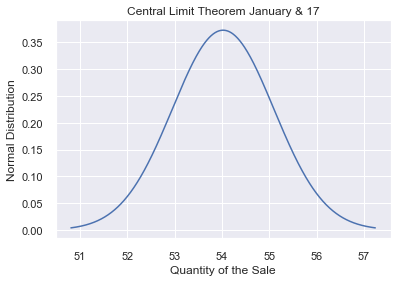

In [79]:
# January & 17
condition_index = 1
single_plot(describe_dict, condition_index)



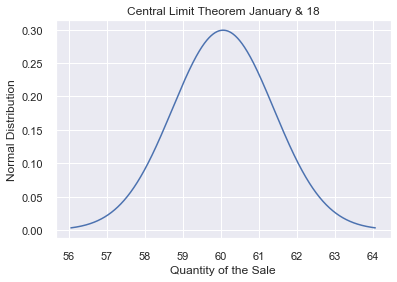

In [81]:
# January & 18
condition_index = 2
single_plot(describe_dict, condition_index)



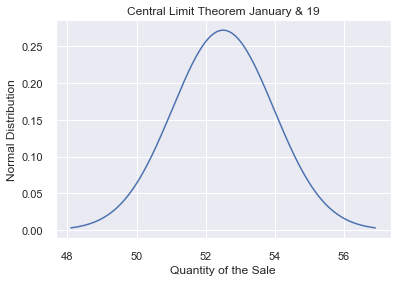

In [82]:
# January & 19
condition_index = 3
single_plot(describe_dict, condition_index)



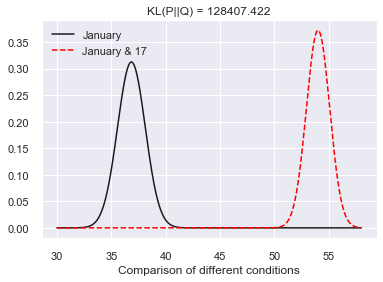

In [92]:
# range and precision of the plot
range_list = [30, 58, 0.001]
# 17
condition_index = 1
comparison_kl_plot(describe_dict, condition_index, range_list)

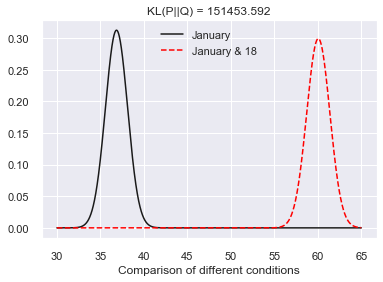

In [88]:
# range and precision of the plot
range_list = [30, 65, 0.001]
# 18
condition_index = 2
comparison_kl_plot(describe_dict, condition_index, range_list)



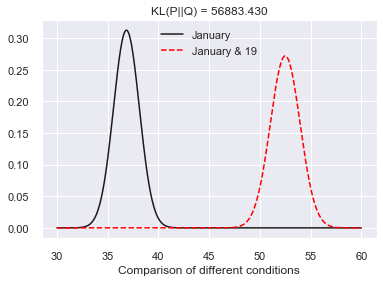

In [90]:
# range and precision of the plot
range_list = [30, 60, 0.001]
# 19
condition_index = 3
comparison_kl_plot(describe_dict, condition_index, range_list)



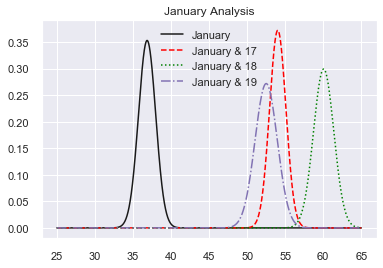

In [86]:
# range and precision of the plot
range_list = [25, 65, 0.001]
# All Conditions
comparison_plot(describe_dict, range_list)
